In [98]:
# import requests
import shifterator as sh
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from collections import Counter

Download Peter's parsed files.

Really should be a pipeline.

In [7]:
# def download_text(text_urls: dict, download_dir) -> None:

#     query_parameters = {'downloadformat': 'txt'}
#     for name, url in text_urls.items():
#         response = requests.get(url, params=query_parameters)
        
#         # write to disk
#         outfile = download_dir + name + '.txt'
#         with open(outfile, mode='w') as file:
#             file.write(response.text)

# narrative_ts = {
#     'pride_prej': catalog.load('params:gutenberg_peter.narrative_ts.pride_prej'),
#     'frankenstein': catalog.load('params:gutenberg_peter.narrative_ts.frankenstein'),
#     'moby_dick': catalog.load('params:gutenberg_peter.narrative_ts.moby_dick')
# }

# onegrams = {
#     'pride_prej': catalog.load('params:gutenberg_peter.onegrams.pride_prej'),
#     'frankenstein': catalog.load('params:gutenberg_peter.onegrams.frankenstein'),
#     'moby_dick': catalog.load('params:gutenberg_peter.onegrams.moby_dick'),
# }


# download_text(narrative_ts, '../data/02_intermediate/gutenberg_peter/narrative_ts/')
# download_text(onegrams, '../data/02_intermediate/gutenberg_peter/onegrams/')

In [10]:
%reload_kedro

[02/15/24 14:39:50] INFO     Resolved project path as:                                              ]8;id=599442;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=749383;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /Users/tony/Documents/phd/courses/PoCS2/spiteful-allegory/work.                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[02/15/24 14:39:50] WARNING  /Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/fram ]8;id=462529;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=355478;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py#109\109]8;;\
                             ework/session/session.py:267: KedroDeprecationWarning: ConfigLoader                   
                             will be deprecated in Kedro 0.19. Please use the OmegaConfigLoader                    
                             instead. To consult the documentation for OmegaConfigLoader, see here:                
                             https://docs.kedro.org/en/stable/configuration/advanced_configuration.                
                             html#omegaconfigloader                                                                
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/lazy_loade ]8;id=559489;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=974446;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py#109\109]8;;\
                             r/__init__.py:78: KedroDeprecationWarning: 'TextDataSet' has been                     
                             renamed to 'TextDataset', and the alias will be removed in                            
                             Kedro-Datasets 2.0.0                                                                  
                               attr = getattr(submod, name)                                                        
                                                                                                                   

                    WARNING  /Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/lazy_loade ]8;id=616334;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=409460;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py#109\109]8;;\
                             r/__init__.py:78: KedroDeprecationWarning: 'CSVDataSet' has been                      
                             renamed to 'CSVDataset', and the alias will be removed in                             
                             Kedro-Datasets 2.0.0                                                                  
                               attr = getattr(submod, name)                                                        
                                                                                                                   

                    INFO     Kedro project work                                                     ]8;id=918008;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=165109;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=162132;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=70562;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [31]:
narrative_ts = {
    'pride_prej': catalog.load('gb_ts_pride_prej').split(),
    'frankenstein': catalog.load('gb_ts_frankenstein').split(),
    'moby_dick': catalog.load('gb_ts_moby_dick').split()
}

onegrams = {
    'pride_prej': catalog.load('gb_onegrams_pride_prej'),
    'frankenstein': catalog.load('gb_onegrams_frankenstein'),
    'moby_dick': catalog.load('gb_onegrams_moby_dick'),
}


[02/15/24 14:55:46] INFO     Loading data from 'gb_ts_pride_prej' (TextDataset)...              ]8;id=997463;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=637722;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'gb_ts_frankenstein' (TextDataset)...            ]8;id=249506;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=165602;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'gb_ts_moby_dick' (TextDataset)...               ]8;id=536113;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=784442;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'gb_onegrams_pride_prej' (CSVDataset)...         ]8;id=541585;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=744810;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    WARNING  /Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro_data ]8;id=840837;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=230779;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py#109\109]8;;\
                             sets/pandas/csv_dataset.py:163: ParserWarning: Falling back to the                    
                             'python' engine because the 'c' engine does not support regex                         
                             separators (separators > 1 char and different from '\s+' are                          
                             interpreted as regex); you can avoid this warning by specifying                       
                             engine='python'.                                                                      
                               return pd.read_csv(load_path, **self._load_args)                                    
                                                                                                                   

                    INFO     Loading data from 'gb_onegrams_frankenstein' (CSVDataset)...       ]8;id=568360;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=238549;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    WARNING  /Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro_data ]8;id=465951;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=760461;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py#109\109]8;;\
                             sets/pandas/csv_dataset.py:163: ParserWarning: Falling back to the                    
                             'python' engine because the 'c' engine does not support regex                         
                             separators (separators > 1 char and different from '\s+' are                          
                             interpreted as regex); you can avoid this warning by specifying                       
                             engine='python'.                                                                      
                               return pd.read_csv(load_path, **self._load_args)                                    
                                                                                                                   

                    INFO     Loading data from 'gb_onegrams_moby_dick' (CSVDataset)...          ]8;id=670571;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=603308;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    WARNING  /Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro_data ]8;id=699541;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=428588;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py#109\109]8;;\
                             sets/pandas/csv_dataset.py:163: ParserWarning: Falling back to the                    
                             'python' engine because the 'c' engine does not support regex                         
                             separators (separators > 1 char and different from '\s+' are                          
                             interpreted as regex); you can avoid this warning by specifying                       
                             engine='python'.                                                                      
                               return pd.read_csv(load_path, **self._load_args)                                    
                                                                                                                   

## Question 1

There's probably a way to simply measure the happiness of a text using `shifterator`, but if there is, I didn't see it documented. Let's roll our own.

In [12]:
labMT = pd.read_csv(
    '../data/03_primary/labMT_english.tsv', 
    sep='\t', 
    header=None,
    names=['word', 'happiness'])
labMT.head()

,word,happiness
0,laughter,8.50
1,happiness,8.44
2,love,8.42
3,happy,8.30
4,laughed,8.26


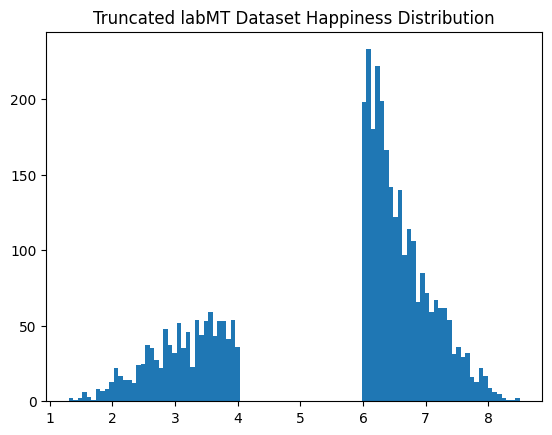

In [49]:
lens_min = 4
lens_max = 6

labMT_trunc = labMT[(labMT['happiness'] <= lens_min) | (labMT['happiness'] >= lens_max)]

plt.hist(labMT_trunc['happiness'], bins=100)
plt.title('Truncated labMT Dataset Happiness Distribution')
plt.savefig('../data/08_reporting/assign14_trunc_labMT_dist.png', dpi=250, bbox_inches='tight')

In [48]:
def get_avg_happines(text, map, filter=(4,6), rtn_datasets=False):

    if filter:
        lens_min = filter[0]
        lens_max = filter[1]

        map = map[(map['happiness'] <= lens_min) | (map['happiness'] >= lens_max)]

    joined = (text
              .set_index('word')
              .join(map.set_index('word'))
              .dropna())
    
    avg = joined['happiness'].mean()
    weighted_avg = np.average(a=joined['happiness'], weights=joined['count'])

    rtn = {
        'h_avg': avg,
        'weighted_h_avg': weighted_avg
    }

    ds = {
        'joined': joined,
        'map': map
    }

    if rtn_datasets:
        rtn.update(ds)

    return rtn

In [48]:
get_avg_happines(onegrams['pride_prej'], labMT)

{'h_avg': 5.7416421895861145, 'weighted_h_avg': 5.990087674621653}

In [51]:
get_avg_happines(onegrams['frankenstein'], labMT)

{'h_avg': 5.639433174224343, 'weighted_h_avg': 5.850225994928895}

In [52]:
get_avg_happines(onegrams['moby_dick'], labMT)

{'h_avg': 5.665922330097088, 'weighted_h_avg': 5.772606730286289}

In [15]:
test = onegrams['frankenstein'].set_index('word')['count'].to_dict()

## Question 2

Need a way to break up time-series into fractions

In [43]:
def split_narrative_ts(ts: list, first_middle_last='first', prop=0.5, prop2=None, return_counts=True) -> dict:
    '''Return the first/last portion (prop) of a list.'''

    N = len(ts)

    if first_middle_last == 'first':
        min_idx = 0
        max_idx = int(prop * N)
    elif first_middle_last == 'middle':
        min_idx = int(prop * N)
        max_idx = int(prop2 * N)
    elif first_middle_last == 'last':
        min_idx = int(prop * N)
        max_idx = N-1

    frac = ts[min_idx:max_idx]

    if return_counts:
        counts = Counter(frac).most_common()
        counts = dict(counts)
    
    rtn = {
        'narrative_ts_frac': frac,
        'counts': counts
    }
    
    return rtn



In [44]:
pp_nts = narrative_ts['pride_prej']
frk_nts = narrative_ts['frankenstein']
md_nts = narrative_ts['moby_dick']

pp_first40 = split_narrative_ts(pp_nts, 'first', prop=0.4)
pp_7075 = split_narrative_ts(pp_nts, 'middle', prop=0.7, prop2=0.75)

frk_first20 = split_narrative_ts(frk_nts, 'first', prop=0.2)
frk_last10 = split_narrative_ts(frk_nts, 'last', prop=0.1)

md_whole = split_narrative_ts(md_nts, 'first', prop=1)
md_8090 = split_narrative_ts(md_nts, 'middle', prop=0.8, prop2=0.9)

In [65]:
def happines_from_count_dict(counts: dict, ref, filter=(4,6)):  

    df = pd.DataFrame.from_dict(
        counts['counts'], 
        orient='index', 
        columns=['count'])
    df = df.reset_index(names=['word'])

    avg = get_avg_happines(df, ref, filter)

    return avg['weighted_h_avg']

## 2a)

In [84]:
pp_first40_ref_hap = happines_from_count_dict(pp_first40, labMT)
frk_first20_ref_hap = happines_from_count_dict(frk_first20, labMT)
md_whole_ref_hap = happines_from_count_dict(md_whole, labMT)

pride_prej_shift = sh.WeightedAvgShift(type2freq_1=pp_first40['counts'],
                                      type2freq_2=pp_7075['counts'],
                                      type2score_1='labMT_English',
                                      reference_value=pp_first40_ref_hap,
                                      stop_lens=[(4,6)])

frk_shift = sh.WeightedAvgShift(type2freq_1=frk_first20['counts'],
                                      type2freq_2=frk_last10['counts'],
                                      type2score_1='labMT_English',
                                      reference_value=frk_first20_ref_hap,
                                      stop_lens=[(4,6)])

md_shift = sh.WeightedAvgShift(type2freq_1=md_whole['counts'],
                                      type2freq_2=md_8090['counts'],
                                      type2score_1='labMT_English',
                                      reference_value=md_whole_ref_hap,
                                      stop_lens=[(4,6)])

In [114]:
def produce_wordshift_plot(shift, names, ax):

    shift.get_shift_graph(system_names=names,
                          ax=ax,
                          text_size_inset=False,
                          cumulative_inset=False,
                          show_plot=False)
    

[02/15/24 15:56:49] WARNING  /Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/shifterato ]8;id=78207;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=289578;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py#109\109]8;;\
                             r/plotting.py:604: UserWarning: FixedFormatter should only be used                    
                             together with FixedLocator                                                            
                               ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])                 
                                                                                                                   

                    WARNING  /Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/shifterato ]8;id=956687;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=522500;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py#109\109]8;;\
                             r/plotting.py:604: UserWarning: FixedFormatter should only be used                    
                             together with FixedLocator                                                            
                               ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])                 
                                                                                                                   

[02/15/24 15:56:50] WARNING  /Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/shifterato ]8;id=39052;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=664741;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py#109\109]8;;\
                             r/plotting.py:604: UserWarning: FixedFormatter should only be used                    
                             together with FixedLocator                                                            
                               ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])                 
                                                                                                                   

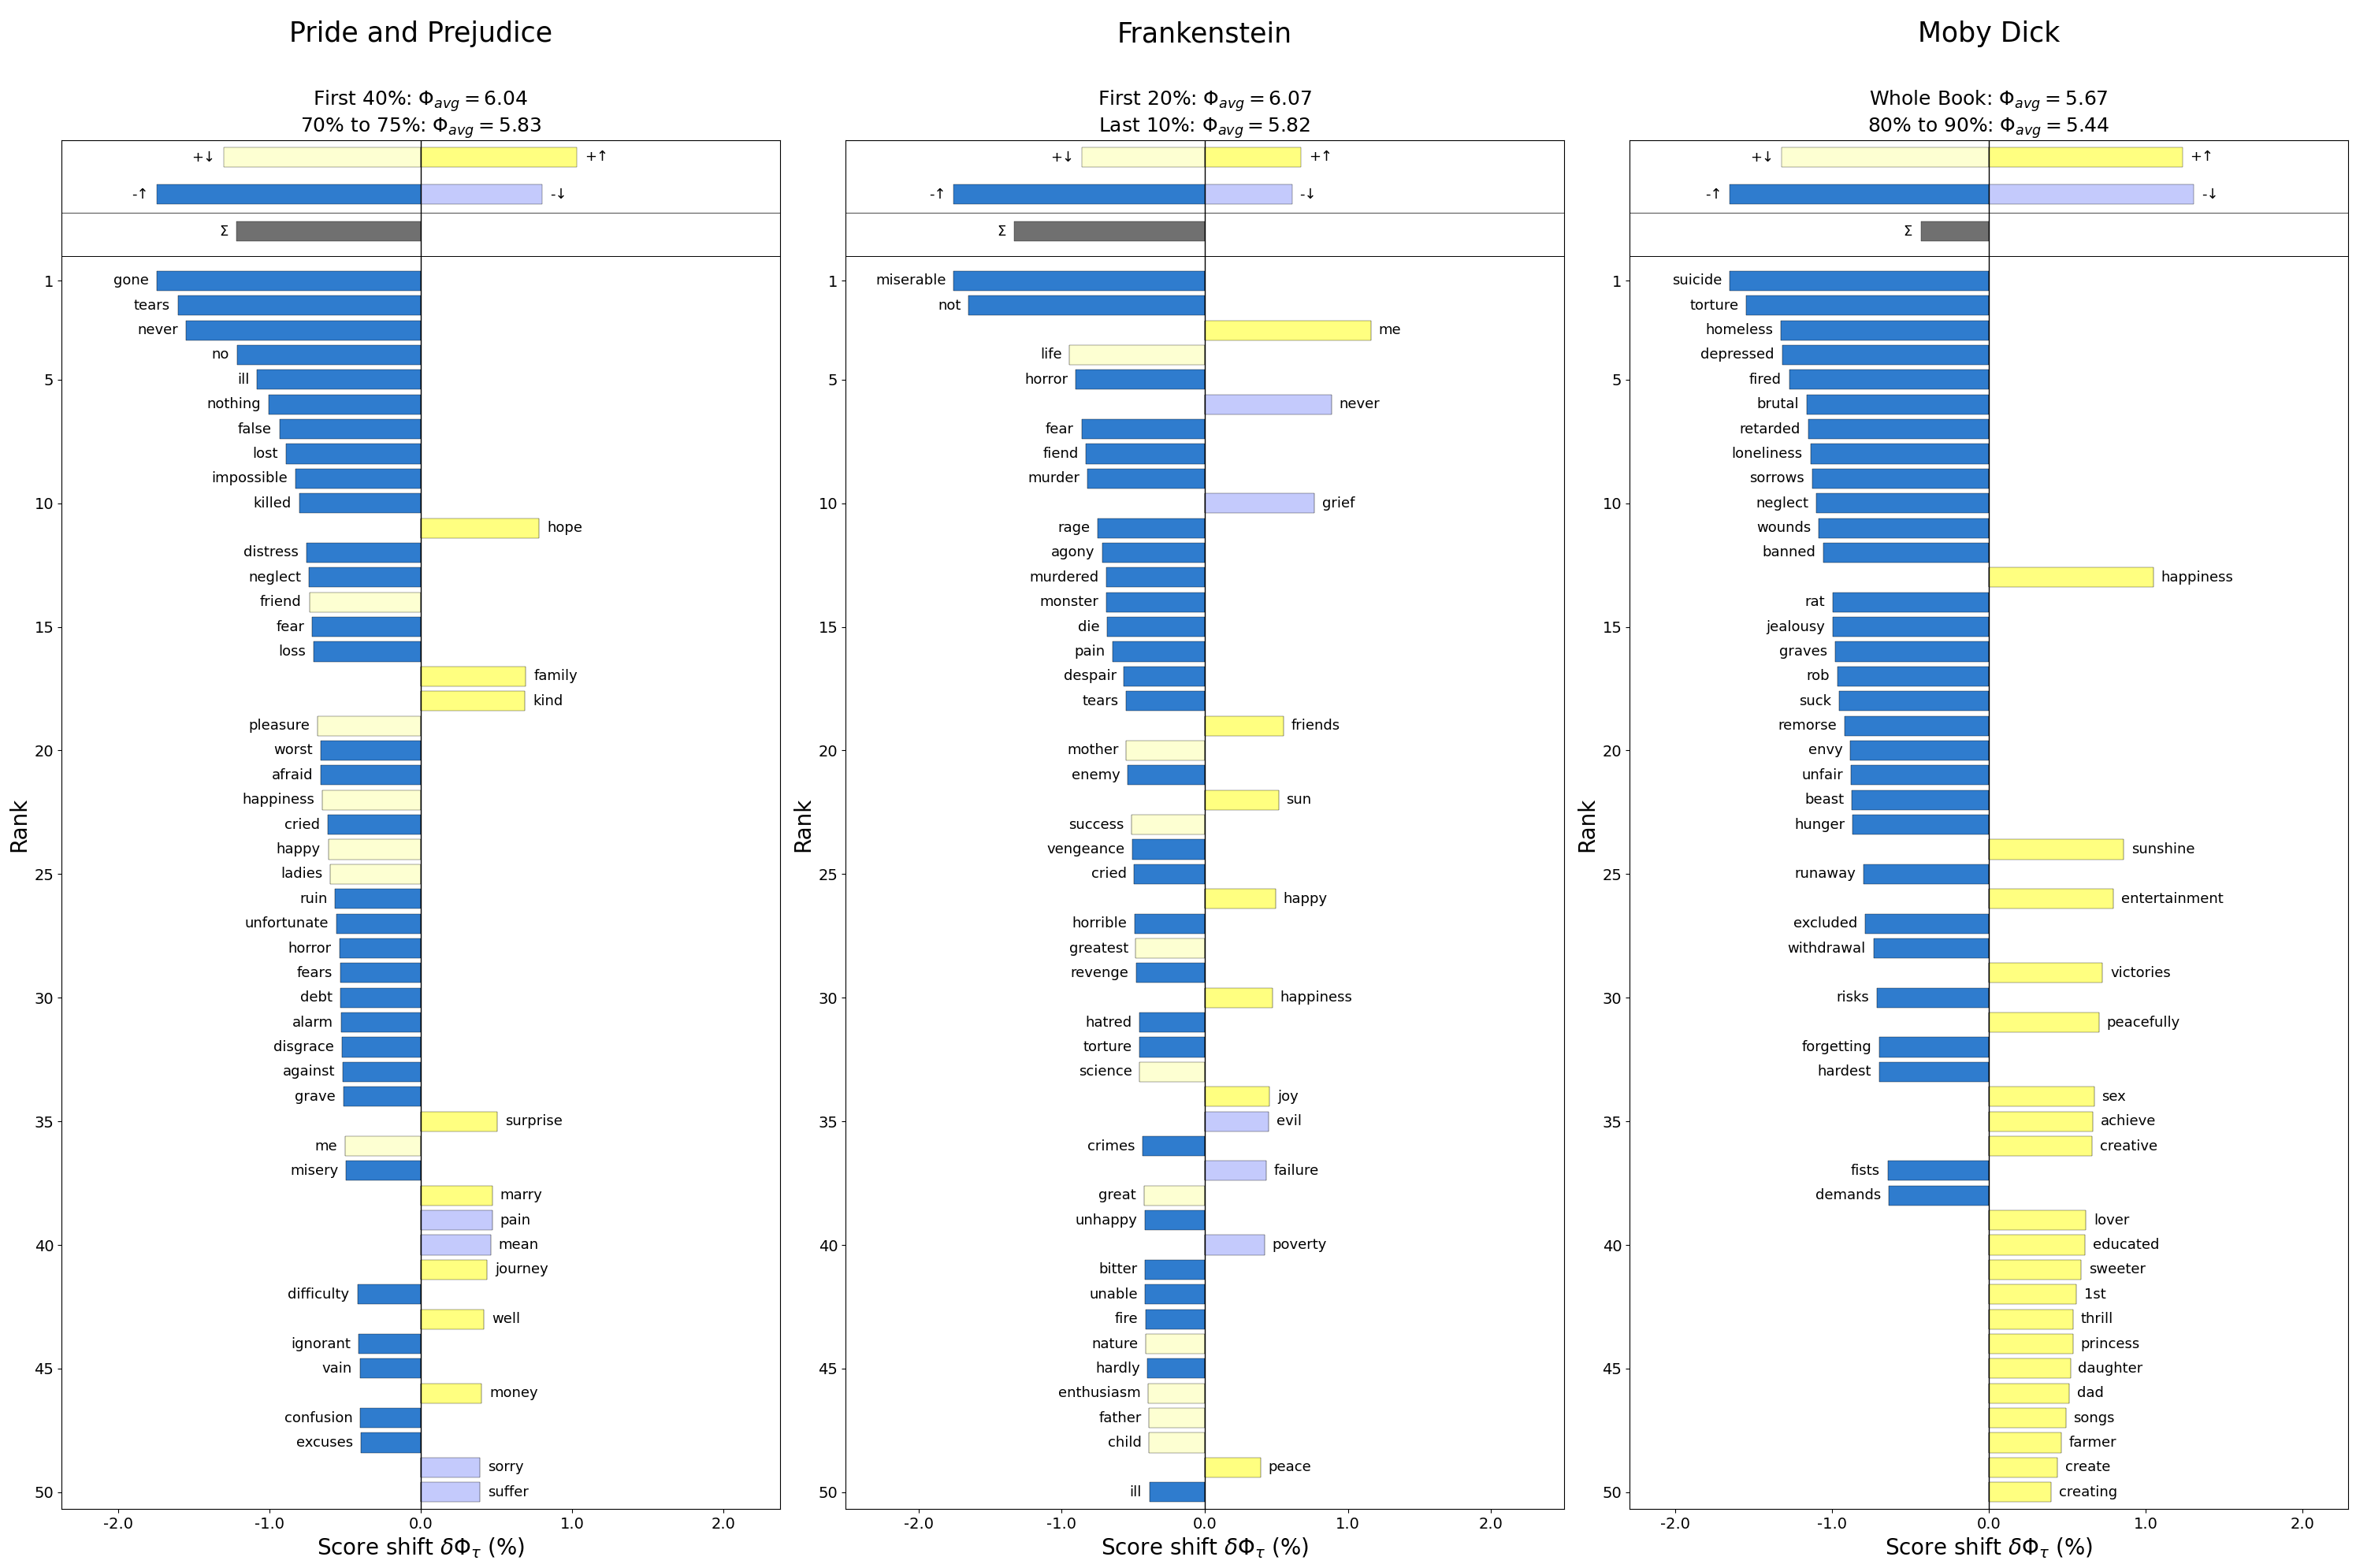

In [115]:
NROW = 2
NCOL = 3

titles = [
    "Pride and Prejudice",
    "Frankenstein",
    "Moby Dick"
    ]

fig, axs = plt.subplots(NROW, NCOL, figsize=(30, 20), height_ratios=[1, 20])

for i, s in zip(range(NCOL), titles):
    axs[0, i].axis('off')
    axs[0, i].text(.5, .5, s, fontsize=25, horizontalalignment='center')

produce_wordshift_plot(pride_prej_shift, ['First 40%', '70% to 75%'], axs[1, 0])
produce_wordshift_plot(frk_shift, ['First 20%', 'Last 10%'], axs[1, 1])
produce_wordshift_plot(md_shift, ['Whole Book', '80% to 90%'], axs[1, 2])

plt.savefig('../data/08_reporting/assign14a_wordshift.png', dpi=300, bbox_inches='tight')

## 2c)

In [116]:
pp_7075_ref_hap = happines_from_count_dict(pp_7075, labMT)
frk_last10_ref_hap = happines_from_count_dict(frk_last10, labMT)
md_8090_ref_hap = happines_from_count_dict(md_8090, labMT)

pride_prej_shift_rev = sh.WeightedAvgShift(type2freq_1=pp_7075['counts'],
                                      type2freq_2=pp_first40['counts'],
                                      type2score_1='labMT_English',
                                      reference_value=pp_7075_ref_hap,
                                      stop_lens=[(4,6)])

frk_shift_rev = sh.WeightedAvgShift(type2freq_1=frk_last10['counts'],
                                      type2freq_2=frk_first20['counts'],
                                      type2score_1='labMT_English',
                                      reference_value=frk_last10_ref_hap,
                                      stop_lens=[(4,6)])

md_shift_rev = sh.WeightedAvgShift(type2freq_1=md_8090['counts'],
                                      type2freq_2=md_whole['counts'],
                                      type2score_1='labMT_English',
                                      reference_value=md_8090_ref_hap,
                                      stop_lens=[(4,6)])

In [ ]:
fig, axs = plt.subplots(NROW, NCOL, figsize=(30, 20), height_ratios=[1, 20])

for i, s in zip(range(NCOL), titles):
    axs[0, i].axis('off')
    axs[0, i].text(.5, .5, s, fontsize=25, horizontalalignment='center')

produce_wordshift_plot(pride_prej_shift_rev, ['70% to 75%', 'First 40%'], axs[1, 0])
produce_wordshift_plot(frk_shift_rev, ['Last 10%', 'First 20%'], axs[1, 1])
produce_wordshift_plot(md_shift_rev, ['80% to 90%', 'Whole Book'], axs[1, 2])

plt.savefig('../data/08_reporting/assign14c_wordshift.png', dpi=300, bbox_inches='tight')